In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa #audio processing package
import librosa.display
import IPython.display as ipd #module contains functions and classes to work with multimedia content like audio, video, images, HTML, and more

## Loading Audio Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
debussy_file = "drive/My Drive/MMA/Lab/piano_c.wav"
redhot_file = "drive/My Drive/MMA/Lab/tremolo.wav"
duke_file = "drive/My Drive/MMA/Lab/violin_c.wav"

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
ipd.Audio(redhot_file)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(duke_file)

In [ ]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file) #sampling rate-> sr ->how many samples are taken at a time in a frame
redhot, _ = librosa.load(redhot_file) #_ means same as above sr
duke, _ = librosa.load(duke_file) #all theses are vectorized values

In [ ]:
print(sr) #array of sample_rate

22050


In [ ]:
debussy.shape

(33968,)

In [ ]:
redhot.shape

(311295,)

In [ ]:
duke.shape

(59772,)

## Root-mean-squared energy with Librosa

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
# frame_size: The number of samples in each frame.
# hop_length: The number of samples by which the analysis window moves forward-overlapping value.-quasi-stationary

In [ ]:
rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

## Visualise RMSE + waveform

##Amplitude Estimation:

RMS provides an effective way to estimate the amplitude of an audio signal. Unlike the peak amplitude, which only considers the maximum value, RMS takes into account the entire waveform, providing a more representative measure of its overall energy.

##Normalization:

RMS is commonly used for normalizing audio signals. Normalization adjusts the amplitude of a signal to a specified level without altering its dynamic range. This is useful in various applications, such as audio mixing and mastering.

"amplitude" refers to the magnitude or strength of a sound wave. It is a measure of the maximum displacement of particles in a medium (such as air, water, or a solid material) caused by the passage of a sound wave

Algo:
1. Square the Samples:(xi)^2
2. Compute the Mean: step1/N
3. Take the Square Root:root(step2)

https://www.gstatic.com/education/formulas2/553212783/en/root_mean_square.svg


In [ ]:
frames = range(len(rms_debussy))
t1 = librosa.frames_to_time(frames, hop_length=HOP_LENGTH) # converting to time domain and then plotting

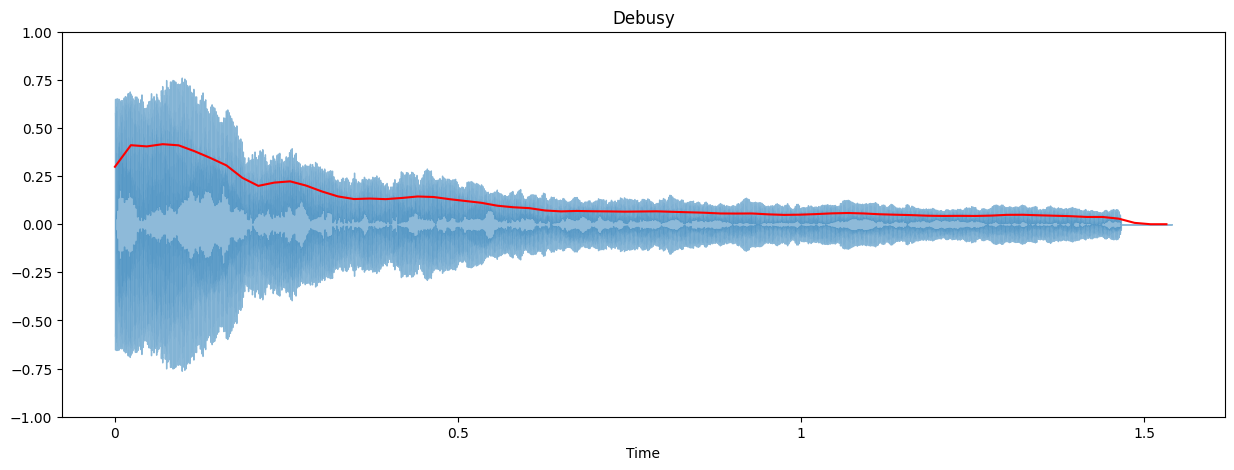

In [ ]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17)) #This line creates a new figure for plotting with Matplotlib and sets its size to 15 inches in width and 17 inches in height.

ax = plt.subplot(3, 1, 1) #This line creates subplots within the figure.
                    #It specifies that there will be three subplots arranged in three rows and one column, and the current plot being referred to is the first subplot.
librosa.display.waveshow(debussy, alpha=0.5) #The alpha=0.5 parameter likely sets the transparency level of the waveform plot.
plt.plot(t1, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")
plt.show()




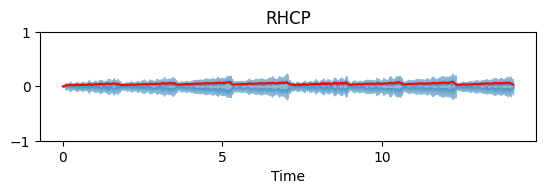

In [ ]:
frames = range(len(rms_redhot))
t2 = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, rms_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")
plt.show()

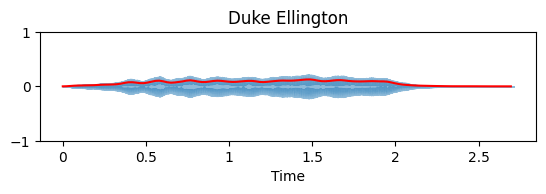

In [ ]:
frames = range(len(rms_duke))
t3 = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, rms_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## RMSE from scratch

RMSE is the difference between actiual and predicted value.

In [ ]:
def rmse(signal, frame_size, hop_length):
    rmse = []

    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [ ]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)
rms_redhot1 = rmse(redhot, FRAME_SIZE, HOP_LENGTH)
rms_duke1 = rmse(duke, FRAME_SIZE, HOP_LENGTH)

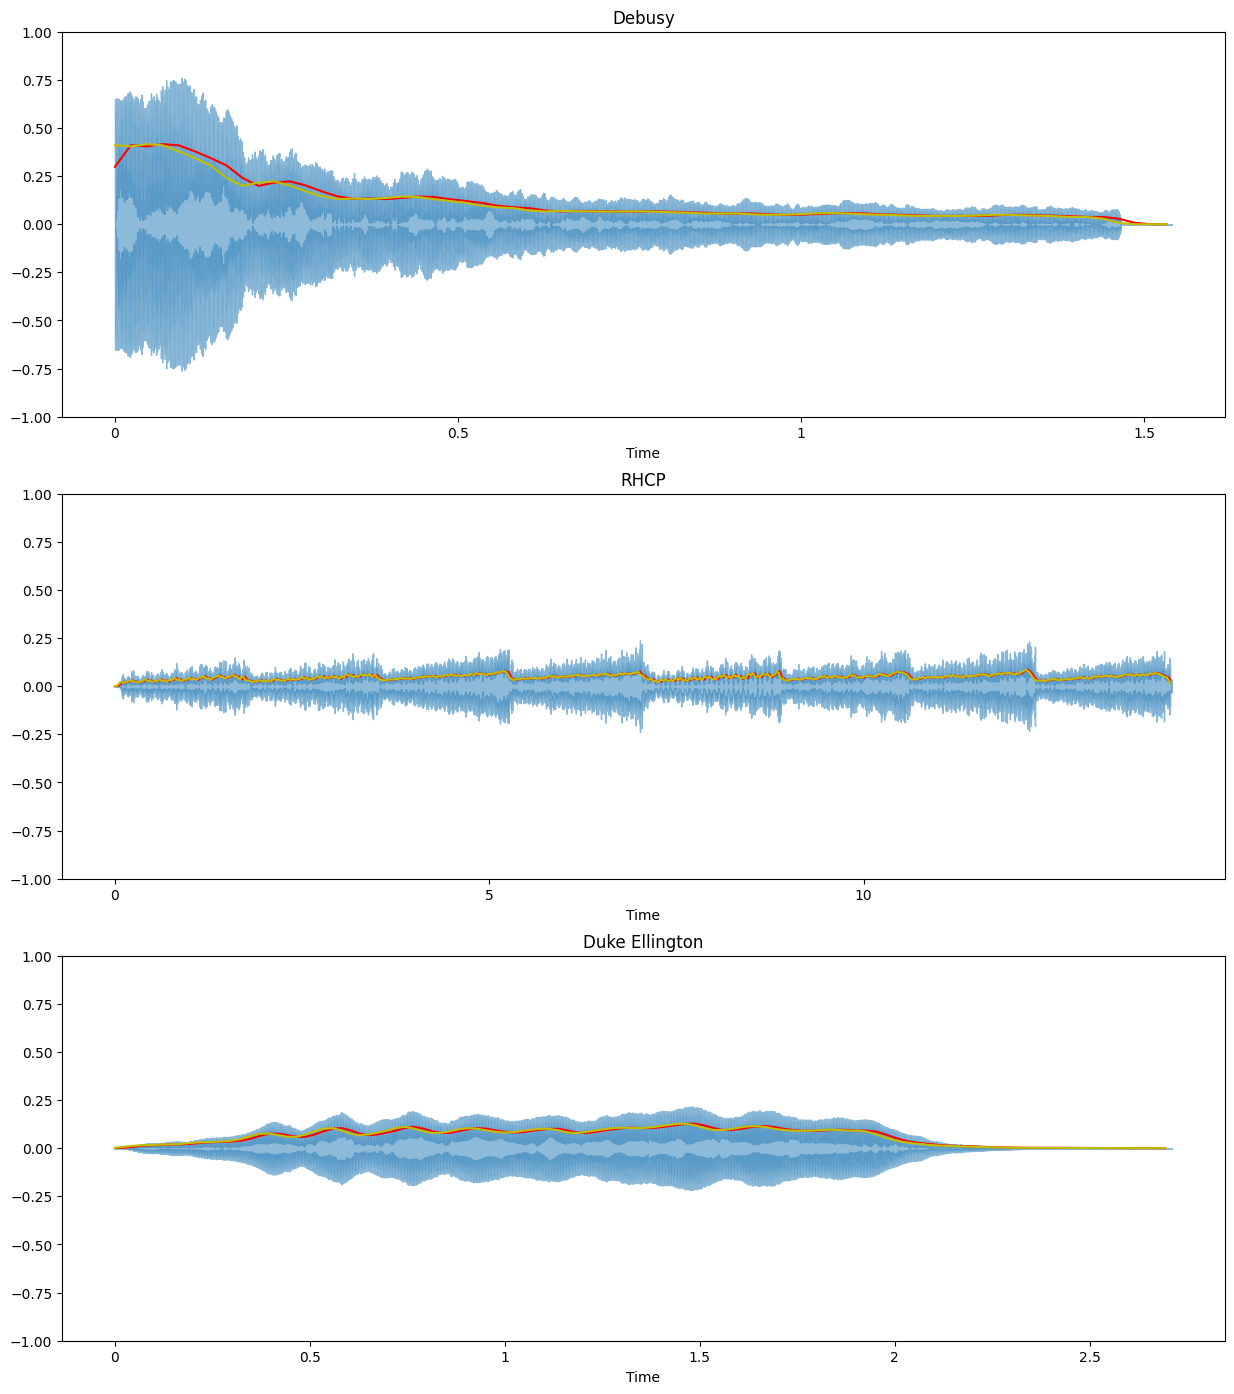

In [ ]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t1, rms_debussy, color="r")
plt.plot(t1, rms_debussy1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, rms_redhot, color="r")
plt.plot(t2, rms_redhot1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, rms_duke, color="r")
plt.plot(t3, rms_duke1, color="y")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## Zero-crossing rate with Librosa
Zero Crossing Rate is the rate at which the signal changes polarity, indicating the number of times the waveform crosses the zero axis.

1. Initialize Counter:
2. Iterate Through Samples:
3. Check for Zero Crossing:
4. Calculate Zero Crossing Rate:
ZCR= Total Number of Samples−1/Number of Zero Crossings
​


In [ ]:
zcr_debussy = librosa.feature.zero_crossing_rate(y=debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(y=redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(y=duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
zcr_debussy.size

67

In [ ]:
zcr_redhot.size

608

In [ ]:
zcr_duke.size

117

## Visualise zero-crossing rate with Librosa

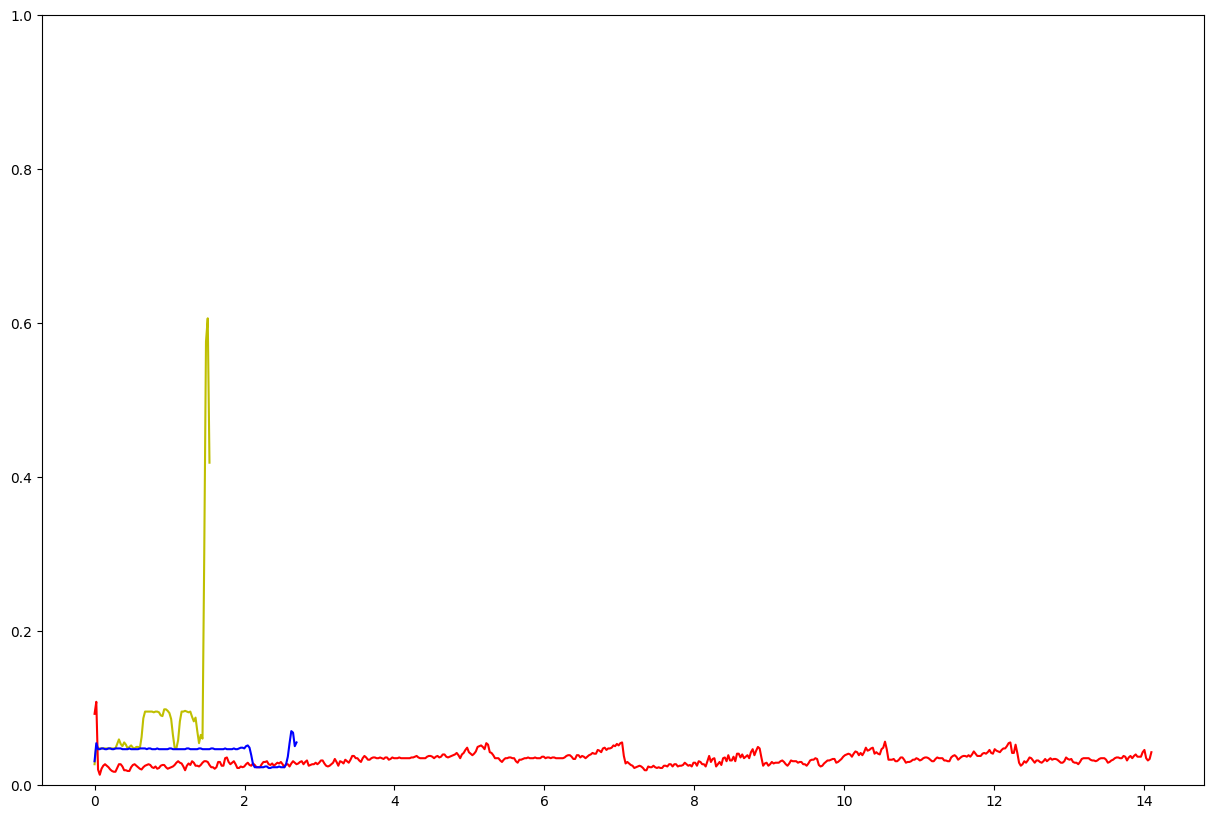

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t1, zcr_debussy, color="y")
plt.plot(t2, zcr_redhot, color="r")
plt.plot(t3, zcr_duke, color="b")
plt.ylim(0, 1)
plt.show()

## ZCR: Voice vs Noise

In [ ]:
# load audio files
voice, _ = librosa.load(debussy_file, duration=15)
noise, _ = librosa.load(redhot_file, duration=15)

In [ ]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames = range(len(zcr_voice))
t1 = librosa.frames_to_time(frames, hop_length=HOP_LENGTH) # converting to time domain and then plotting

In [ ]:
frames = range(len(zcr_noise))
t2 = librosa.frames_to_time(frames, hop_length=HOP_LENGTH) # converting to time domain and then plotting

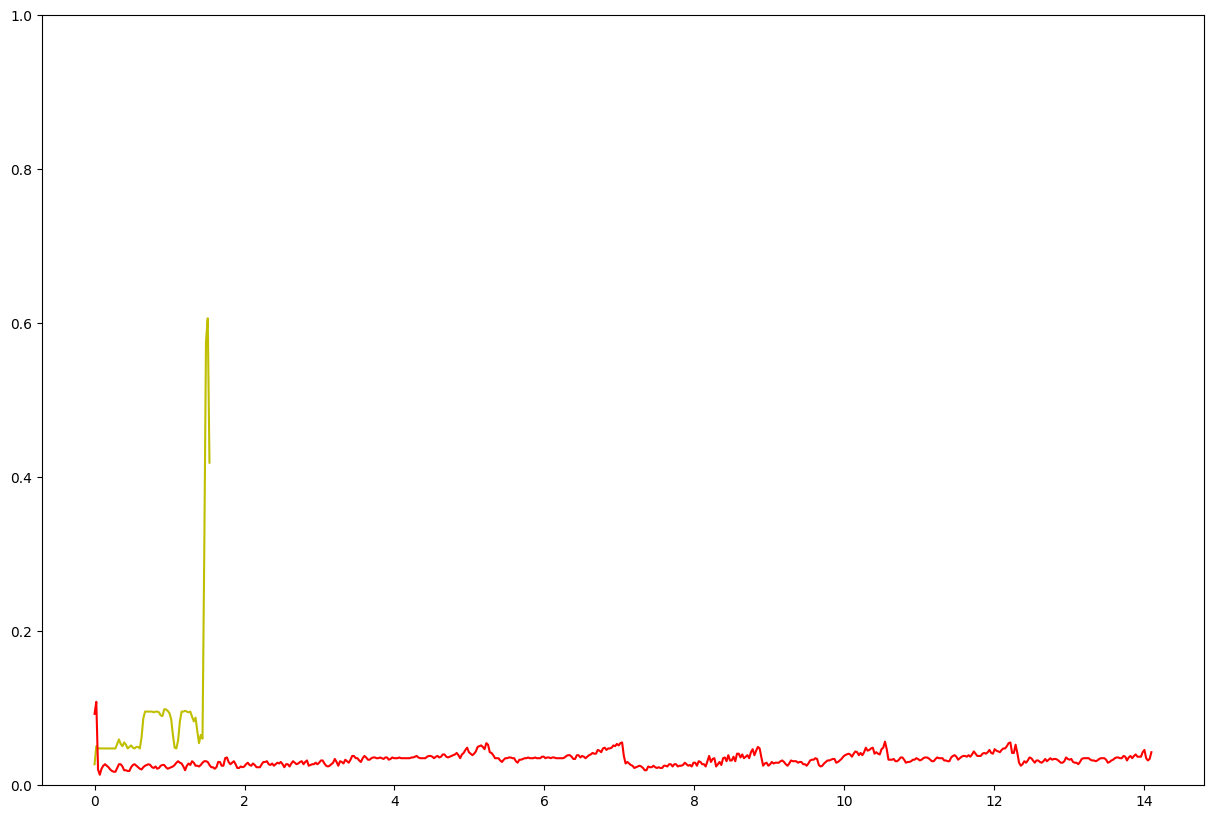

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t1, zcr_voice, color="y")
plt.plot(t2, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()

**AUTO CORRELATION**

Autocorrelation is a mathematical operation that measures the similarity of a signal with a delayed version of itself. It is commonly used in signal processing to analyze periodicity or repeating patterns within a signal. In the context of audio, autocorrelation can reveal information about the periodic nature of certain sounds or musical notes.

 Autocorrelation is useful for detecting periodicities in signals, and the interpretation of the plot depends on the characteristics of the audio signal you are analyzing.

 Formula-> R(τ)=∑  x(t)⋅x(t−τ)
           here (t=0 to N−1 )

 https://www.investopedia.com/thmb/qcL-_1q9TZSlbG39rf8JsZXWbRk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Autocorrelation-FINAL-3b2d9f40e52d4d85aa399528e7133083.jpg

In [ ]:
def calculate_autocorrelation(debussy_file, max_lag=None):
    # Load the audio file
    y, sr = librosa.load(debussy_file)

    # Calculate the autocorrelation
    autocorrelation = librosa.autocorrelate(y, max_size=max_lag)

    return autocorrelation



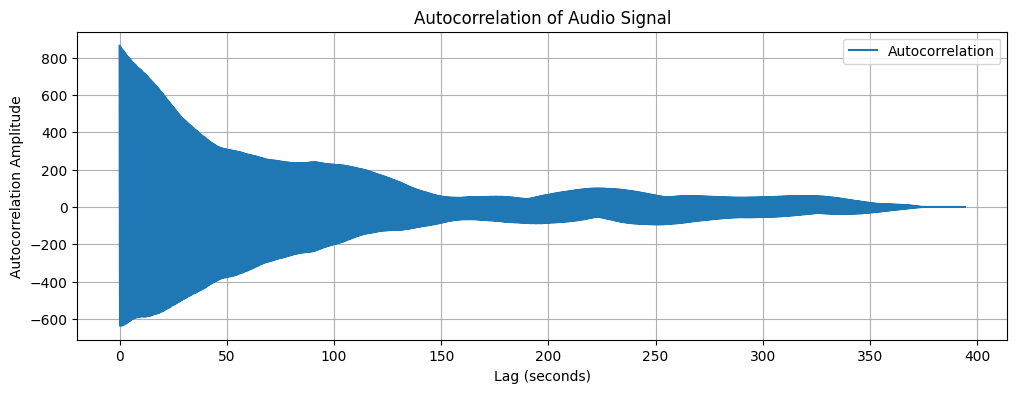

In [ ]:
def plot_autocorrelation(autocorrelation, sr, max_lag=None):
    # Create a time axis for plotting
    lag_times = librosa.times_like(autocorrelation, sr=sr, hop_length=512)
#librosa.times_like to create a time axis corresponding to the autocorrelation values.
    # Plot the autocorrelation
    plt.figure(figsize=(12, 4))
    plt.plot(lag_times, autocorrelation, label='Autocorrelation')
    plt.xlabel('Lag (seconds)')
    plt.ylabel('Autocorrelation Amplitude')
    plt.title('Autocorrelation of Audio Signal')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
autocorrelation = calculate_autocorrelation(debussy_file)
plot_autocorrelation(autocorrelation, sr=librosa.get_samplerate(debussy_file))


**Windowing**

Windowing is a common technique in audio signal processing used to minimize the adverse effects of spectral leakage when applying the Fourier Transform to a finite-duration signal. The Fourier Transform is often used to analyze the frequency content of a signal. However, if the signal is not periodic and extends infinitely, applying the Fourier Transform directly can result in spectral leakage.

Windowing involves multiplying the signal by a window function before applying the Fourier Transform. This window function is typically a tapered, symmetric function that reduces the signal amplitude toward its ends. This process helps to minimize spectral leakage by gradually reducing the amplitude of the signal at the boundaries.

**Types of Windowing**

**1. Rectangular Window**: The rectangular window is the simplest window function, where the entire signal is retained with equal weight. w[n]=1 for 0≤n≤N−1 N is the window size. This windowing function does not taper the signal, which means abrupt changes at the edges can result in spectral leakage.

**2.Hanning Window:**
The Hanning window is designed to smoothly taper the signal to zero at its ends, reducing spectral leakage. The window function is given by w[n]=0.5−0.5cos(2πn/N-1), where N is the window size. It provides a balance between main lobe width and sidelobe suppression.

**3. Hamming Window:**
Similar to the Hanning window, the Hamming window tapers the signal smoothly, but with slightly different characteristics. The window function is defined as w[n]=0.54−0.46cos(2πn/N-1), where N is the window size. The Hamming window has a wider main lobe compared to the Hanning window.

**4.Blackman Window:** The Blackman window is designed to provide better suppression of sidelobes compared to Hanning or Hamming. The window function is given by w[n]=0.42−0.5cos(2πn/N-1)+0.08cos(4πn/N-1), where N is the window size. It has a wider main lobe compared to Hanning or Hamming but better sidelobe suppression.

**5. Kaiser Window:**
The Kaiser window is a flexible window with a shape parameter that allows adjustment of the trade-off between main lobe width and sidelobe suppression. The window function is given by

N is the window size β is the shape parameter. Adjusting the shape parameter β allows you to control the trade-off between the main lobe width and sidelobe suppression. A higher β results in a narrower main lobe and better sidelobe suppression.

In [ ]:
pip install essentia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 12.4 MB/s eta 0:00:00


In [ ]:
from essentia.standard import Windowing
from scipy import signal

w_essentia = Windowing(type='hann')  # specify window function in essentia
w_scipy = signal.get_window('triang', 7)  # apply window function in scipy
w_librosa = signal.get_window('hamm', 7)  # apply window function in librosa

In [ ]:
w_essentia

<essentia.standard._create_essentia_class.<locals>.Algo at 0x7b3b79247340>

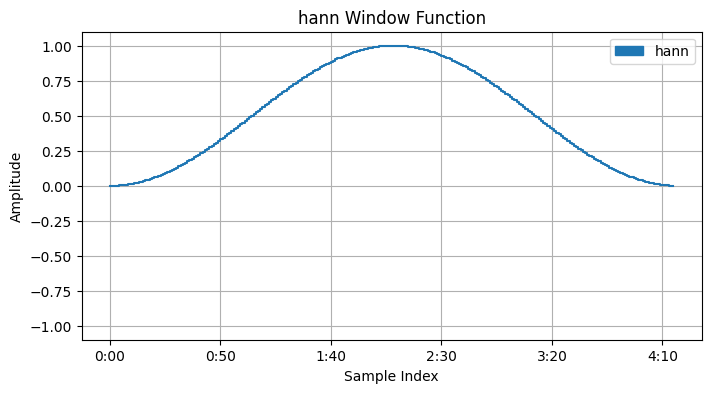

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'hann'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(8, 4))
librosa.display.waveshow(window, sr=1.0, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

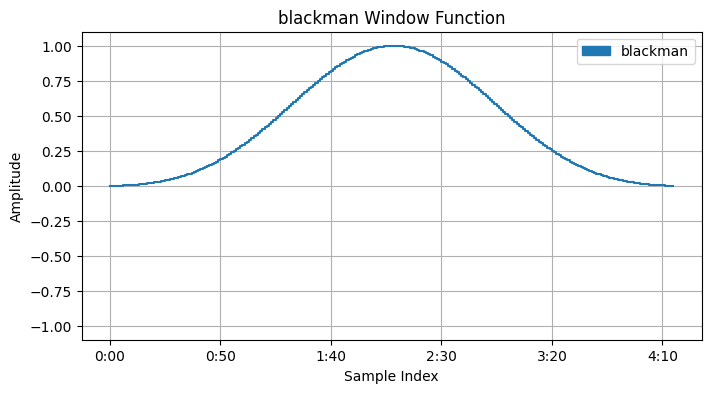

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'blackman'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(8, 4))
librosa.display.waveshow(window, sr=1.0, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

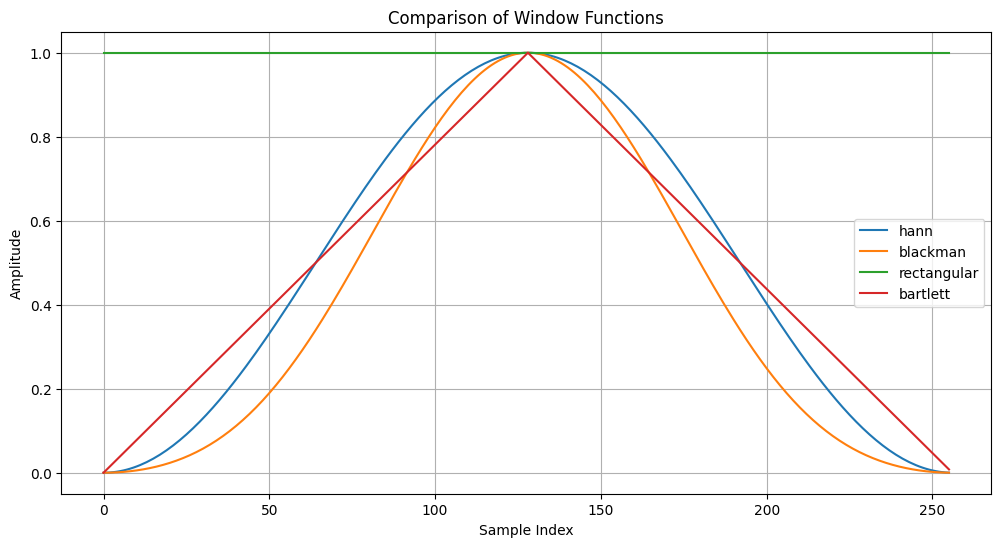

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_types = ['hann', 'blackman','rectangular','bartlett']  # Choose the window functions

# Generate x-axis values (sample indices)
x = np.arange(window_length)

# Plot the window functions
plt.figure(figsize=(12, 6))
for window_type in window_types:
    window = signal.get_window(window_type, window_length)
    plt.plot(x, window, label=window_type)

plt.title('Comparison of Window Functions')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

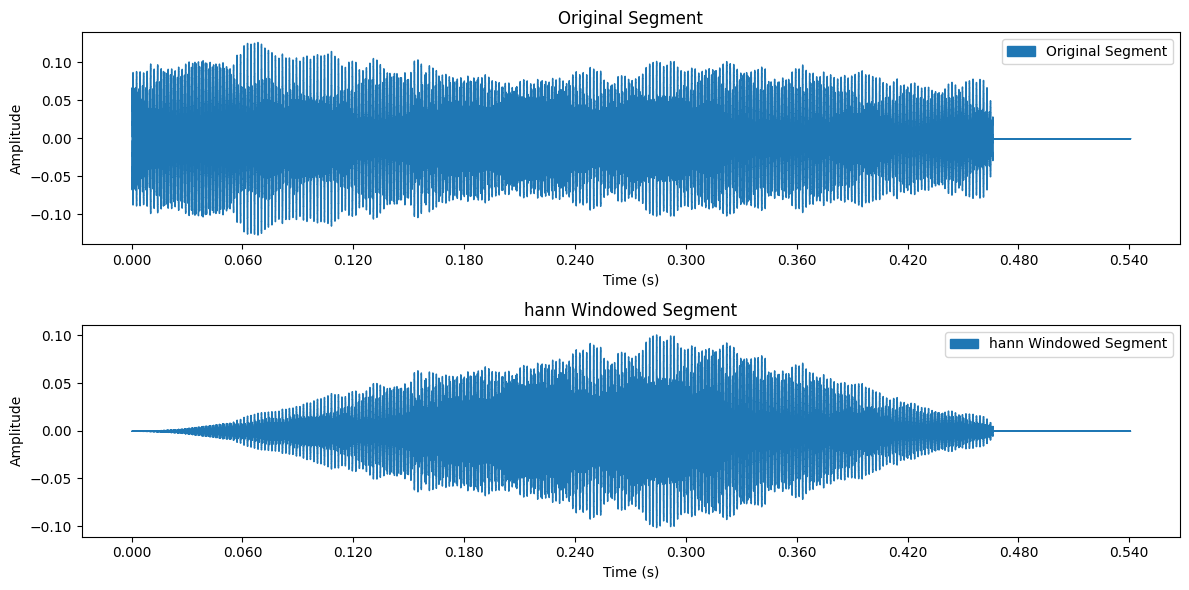

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'hann'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

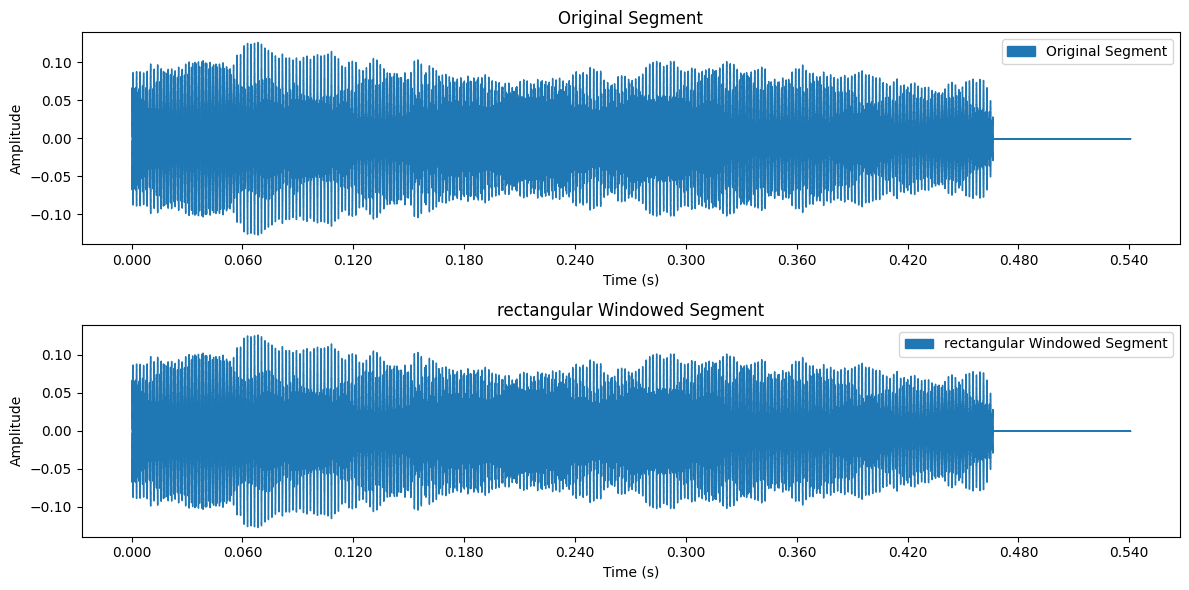

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'rectangular'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

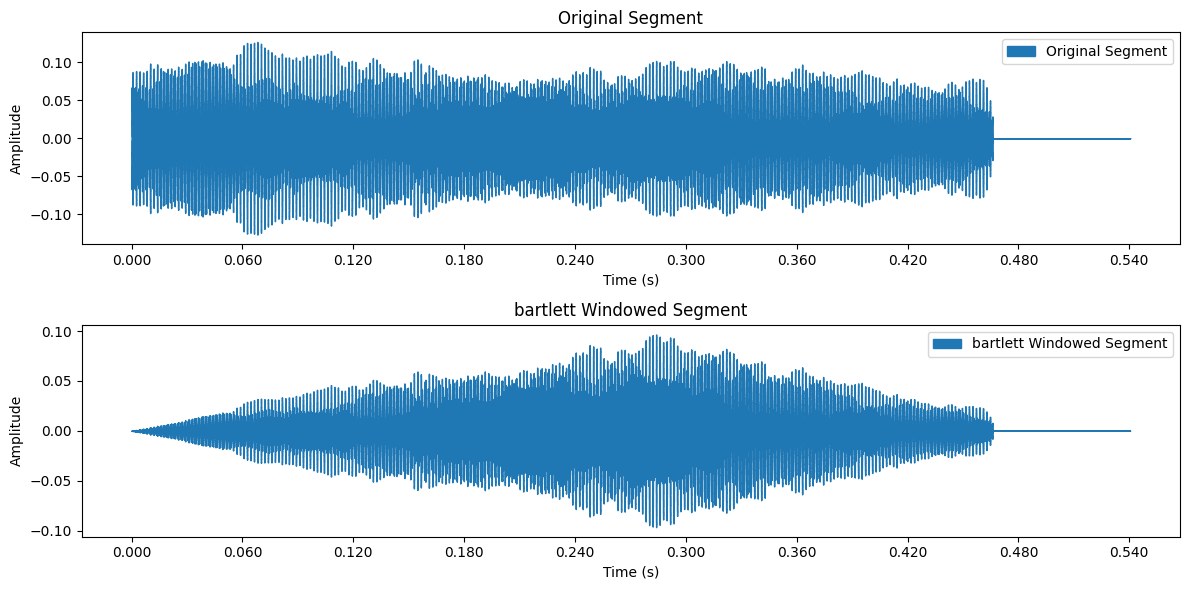

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'bartlett'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

**Short-Time Energy (STE)**
The energy throughout a raw sound signal is variable and it is difficult, therefore, to accurately characterize the energy of a signal. For this, the short time energy, which is the energy from a frame, is calculated. With similar applications to ZCRs, STE is used to detect voiced-unvoiced segments, aid in music onset detection, and discriminate between source types (music, environmental, speech).

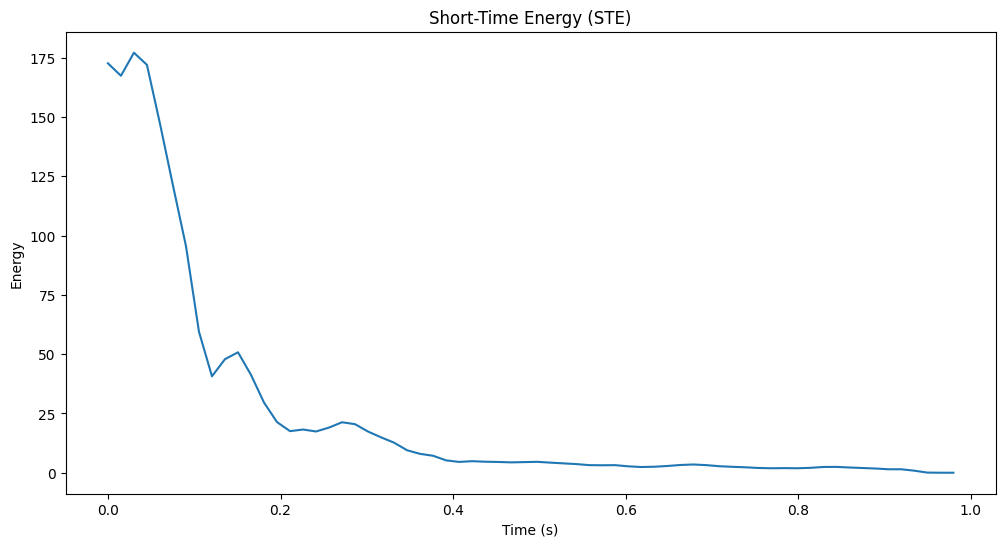

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from essentia.standard import Windowing, FrameGenerator

def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []  # container for signal square
    win = Windowing(type=window_type)  # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the sum of squares (STE) for each frame
    return np.sum(signal_new, axis=1)

# Example usage and plotting
audio_signal, _ = librosa.load(debussy_file)

window_type = 'hann'
frame_length = 1024
hop_size = 512

ste_values = calculateSTE(audio_signal, window_type, frame_length, hop_size)

# Plot the Short-Time Energy
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ste_values)) * hop_size / len(audio_signal), ste_values)
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.show()


**Separation of Harmonic & Percussive Signals** On a very coarse level, many sounds can be categorized as either of the harmonic or percussive sound class. Harmonic sounds are sounds we perceive to have a specific pitch, whereas percussive sounds are often perceived as the result of two colliding objects. Percussive sounds tend to have a clear localization in time moreso than a particular pitch. More granular sound classes can be classified by its harmonic-percussive components ratio. For example, a note played on the piano has a percussive onset (marked by the hammer hitting the strings) preceding a harmonic tone (the result of the vibrating string).

The value of mapping both the time and phase content of a signal in distinguishing between harmonic and percussive components, makes the STFT spectral representation important. The time-frequency bin of the STFT for harmonic component of an input signal is expected to look more horizontal than vertical/time-dependent structure that is a percussive component.

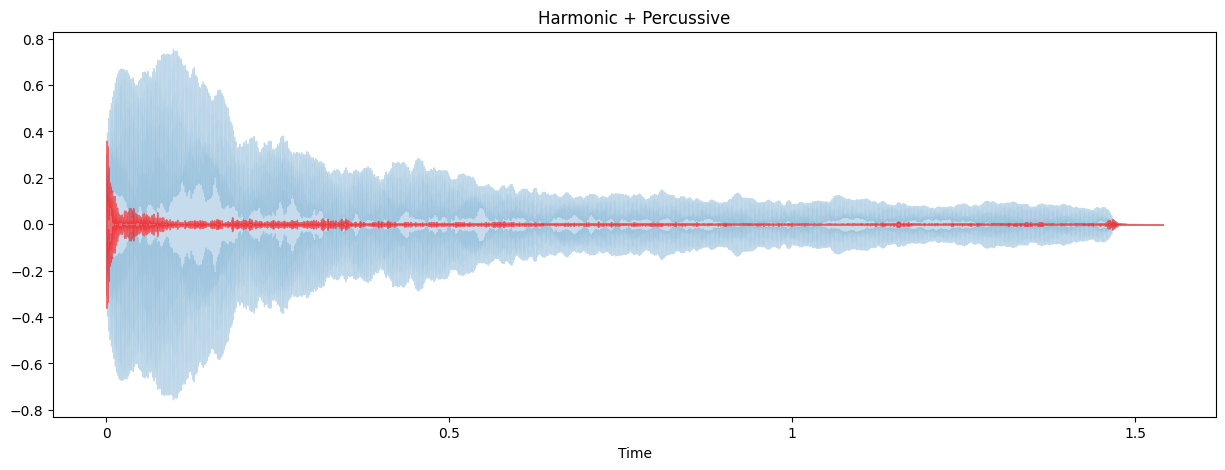

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='red', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.show()

**Beat Extraction**
Particularly useful features to extract from musical sources may be an approximation of tempo as well as the beat onset indices, an array of frame numbers corresponding to beat events.

<ipython-input-23-d62355da9f86>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="rocket", ax=ax)


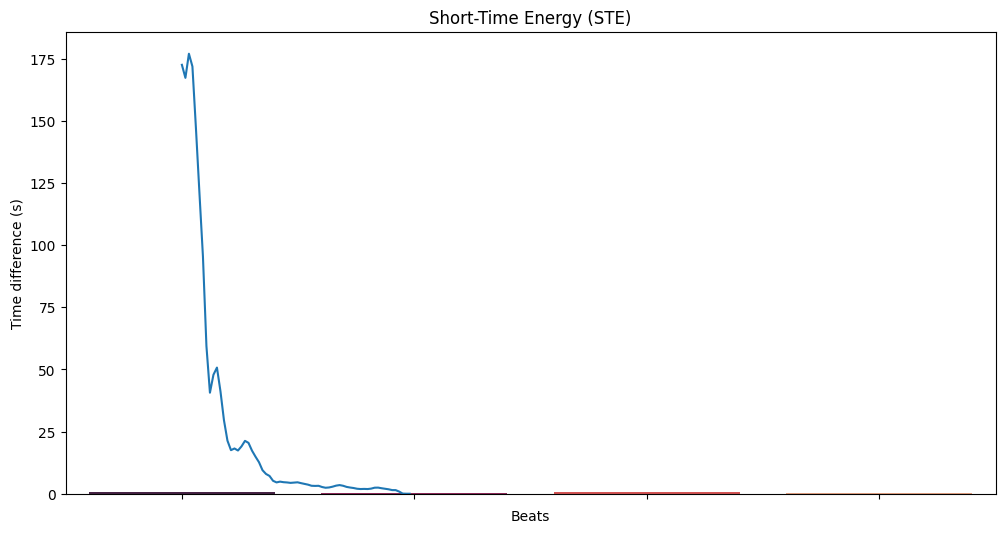

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from essentia.standard import Windowing, FrameGenerator

def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []  # container for signal square
    win = Windowing(type=window_type)  # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the sum of squares (STE) for each frame
    return np.sum(signal_new, axis=1)

audio_signal, _ = audio_signal, _ = librosa.load(debussy_file)

window_type = 'hann'
frame_length = 1024
hop_size = 512

ste_values = calculateSTE(audio_signal, window_type, frame_length, hop_size)

# Plot the Short-Time Energy using seaborn
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ste_values)) * hop_size / len(audio_signal), ste_values)
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')

# Example seaborn barplot
beat_nums = [1, 2, 3, 4]
beat_time_diff = [0.5, 0.3, 0.7, 0.4]

ax = plt.gca()
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")

# Use barplot correctly
g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="rocket", ax=ax)
g.set(xticklabels=[])
plt.show()
